<img src="https://prnewswire2-a.akamaihd.net/p/1893751/sp/189375100/thumbnail/entry_id/1_su9da4fu/def_height/1001/def_width/1911/version/100011/type/2/q/100"  width="300" height="200">

# Exploratory Data Analysis

Let's create a roadmap for Data Analysis
>1. Split our data into train, validate, and test sets
>2. Plot the distributions of each feature and `logerror`.
>3. Plot the interactions each feature and `logerror`.
>4. Feature Engineering
>5. Statistical Tests
>6. Summary

In [1]:
# import the required libraries to assist us in EDA.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# import helper functions
from prepare import prepare_zillow
from wrangle import train_validate_test, impute_values, attributes_target_split, add_scaled_columns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# load our dataset for EDA
df = prepare_zillow()

<br>
<br>
<br>

# Split our data into train, validate, and test sets

In [3]:
# Split data into train, validate, and test sets.
train, validate, test = train_validate_test(df)

# After splitting the data, Impute values for
# train, validate, test using the median for each feature.
train, validate, test = impute_values(train, validate, test)

In [4]:
# Let's check out our training data
print(train.shape)
train.head()

(31463, 23)


,parcelid,num_of_bedrooms,num_of_restrooms,livable_area_sqft,lot_size_sqft,year_built,has_basement,has_hottub_or_spa,has_pool,pool_area_sqft,...,basement_area_sqft,property_tax,structure_tax,land_tax,taxable_value,date_sold,fips,latitude,longitude,logerror
50002,17178758,4.0,3.5,2844.0,4500.0,2003,0,0,0,0.0,...,0.0,6273.00,176419.0,328433.0,504852.0,2017-05-09,6111,34.211156,-119.174179,0.332771
10254,11294644,2.0,2.0,1282.0,6353.0,1986,0,0,0,0.0,...,0.0,2700.23,124263.0,31065.0,155328.0,2017-03-09,6037,34.703819,-118.119752,0.115085
25372,12496674,2.0,1.0,1175.0,4820.0,1950,0,0,0,0.0,...,0.0,5750.83,108385.0,376843.0,485228.0,2017-03-16,6037,33.816603,-118.114331,-0.000979
24999,12480422,4.0,3.0,1765.0,5743.0,1943,0,0,0,0.0,...,0.0,4062.59,106907.0,228541.0,335448.0,2017-03-17,6037,33.867042,-118.129712,0.011115
36733,13989648,3.0,2.0,1053.0,7200.0,1954,0,0,0,0.0,...,0.0,2650.54,67342.0,143981.0,211323.0,2017-07-11,6059,33.822219,-117.966434,0.053176


In [5]:
# Checking the data for any missing/non-imputed values.
# Look's like there are none. We're good to go!
train.describe().T

,count,mean,std,min,25%,50%,75%,max
parcelid,31463.0,1.298828e+07,3.578434e+06,1.071186e+07,1.149657e+07,1.256305e+07,1.412227e+07,1.676870e+08
num_of_bedrooms,31463.0,3.312367e+00,9.356999e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.400000e+01
num_of_restrooms,31463.0,2.306980e+00,1.026015e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
livable_area_sqft,31463.0,1.928402e+03,1.010015e+03,1.280000e+02,1.270000e+03,1.661000e+03,2.308500e+03,1.865400e+04
lot_size_sqft,31463.0,1.116874e+04,7.645269e+04,5.400000e+02,5.614000e+03,6.878000e+03,8.778000e+03,6.971010e+06
year_built,31463.0,1.963462e+03,2.310621e+01,1.885000e+03,1.950000e+03,1.961000e+03,1.979000e+03,2.016000e+03
has_basement,31463.0,9.217176e-04,3.034629e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
has_hottub_or_spa,31463.0,3.032133e-02,1.714727e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
has_pool,31463.0,2.116136e-01,4.084588e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
pool_area_sqft,31463.0,8.778216e+00,7.006624e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+03


<br>
<br>
<br>

# Plot the distributions of each feature with `logerror`

Let's check out the distributions of each feature. There are distinct groupings of our features. Let's plot the distributions for each subgroup and `logerror`.
1. Distributions of Geography Features
2. Distributions of Home Features
3. Distributions of Tax Features

In [6]:
# Create a list of column names to filter for geographical features
geo_features = ['fips',
                'latitude',
                'longitude',
                'logerror'
               ]

# Create a list of column names to filter for home features
home_features = ['parcelid',
                 'num_of_bedrooms',
                 'num_of_restrooms',
                 'livable_area_sqft',
                 'lot_size_sqft',
                 'year_built',
                 'has_basement',
                 'has_hottub_or_spa',
                 'has_pool',
                 'pool_area_sqft',
                 'has_patio',
                 'patio_area_sqft',
                 'has_shed',
                 'basement_area_sqft',
                 'logerror'
                ]

# Create a list of column names to filter for tax features
tax_features = ['property_tax',
                'structure_tax',
                'land_tax',
                'taxable_value',
                'logerror'
               ]


# Create a copy of our train data.
distributions = train.copy()

# drop the date column for now
distributions.drop(columns='date_sold', inplace=True)

## 1. Distributions of Location features
Let's start with a birds eye view of our data:<br>
latitude, longitutde, fips, logerror

In [7]:
# filter our dataset for geographic features
geo_dists = distributions[geo_features].copy()

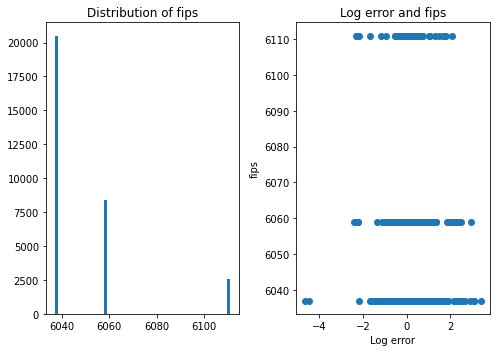

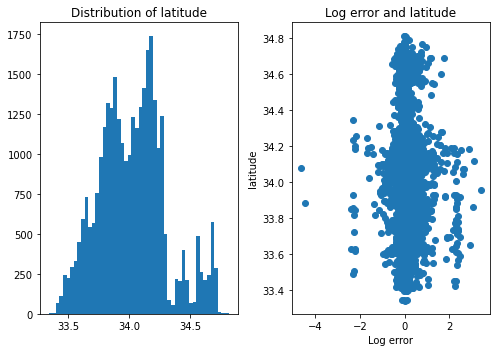

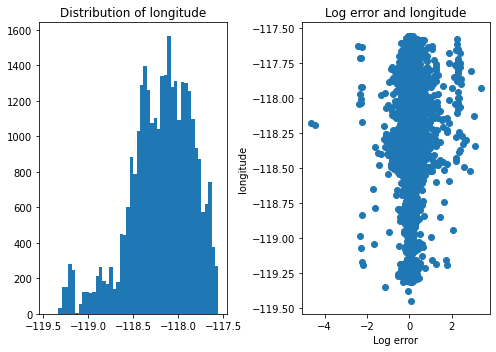

In [8]:
# Visualize the distribution of geographical features and logerror
for i in geo_dists.columns[:-1]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,5))
    fig.subplots_adjust(left=None, bottom=0.1, right=0.9, top=0.9, wspace=0.9, hspace=0.2)
    ax1.hist(geo_dists[i], bins=50)
    ax2.scatter(geo_dists.logerror, geo_dists[i])
    ax1.title.set_text(f'Distribution of {i}')
    ax2.title.set_text(f'Log error and {i}')
    ax2.set_xlabel('Log error')
    ax2.set_ylabel(f'{i}')
    plt.tight_layout()
    plt.show()

### Takeaways: Distributions of Geography Features
Observations
> Fips 6037 contains the most properties in our data followed by fips 6059, and fips 6111.
>
> The largest log errors occur in fips 6037 - Los Angeles

 We'll plot the longitude and latitude features later.`fips` represents the county a property is located in. We'll take a look at the interaction between `fips` and home features later to determine if any relationship exists.
 
---
## Distributions of Home Features

Let's take a look the features that describe our properties

In [9]:
home_dists = distributions[home_features].copy()

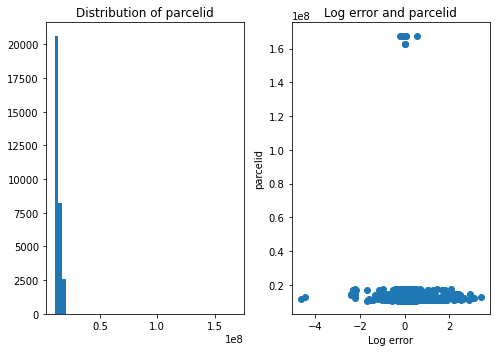

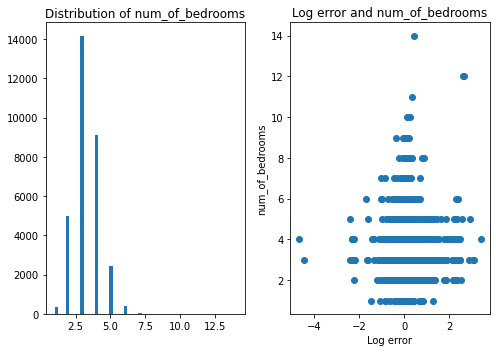

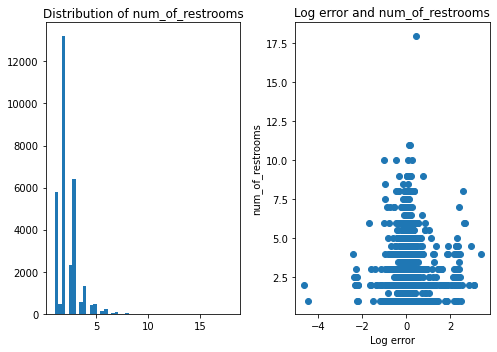

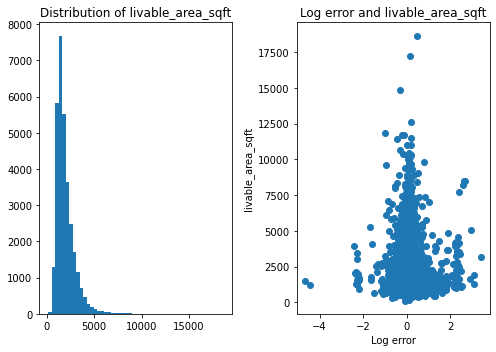

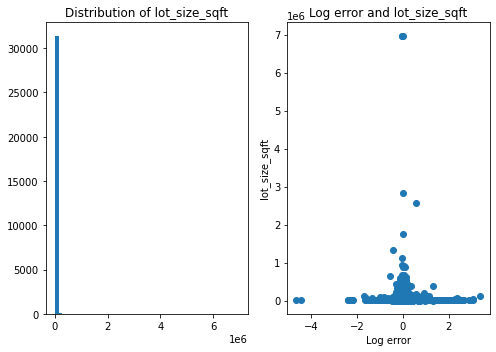

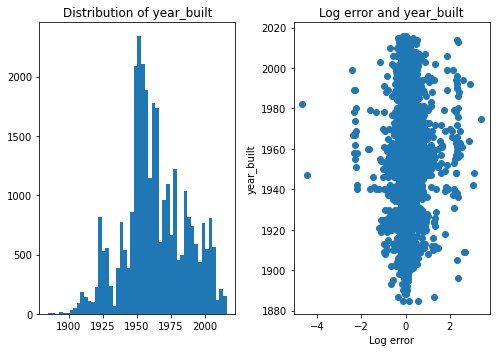

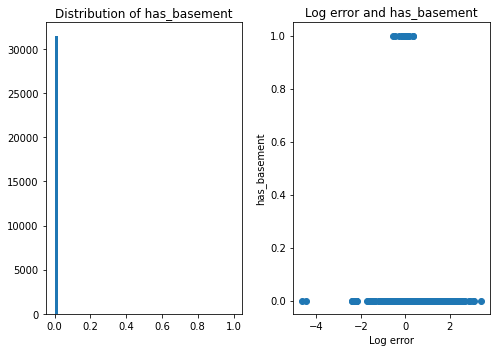

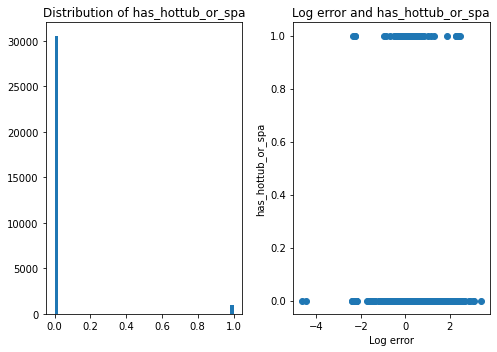

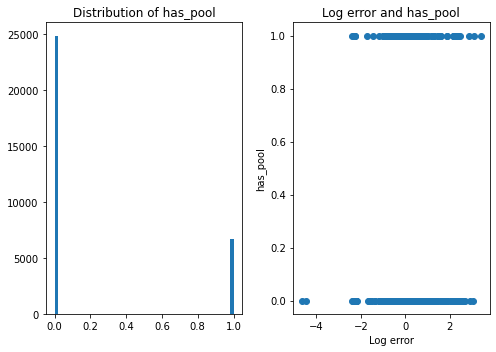

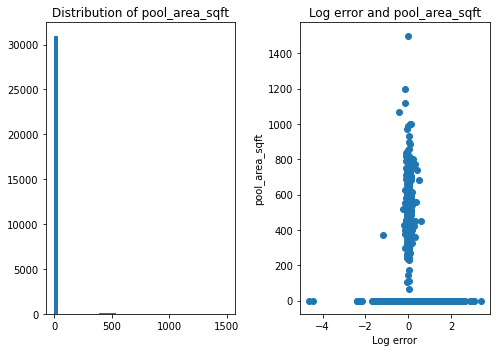

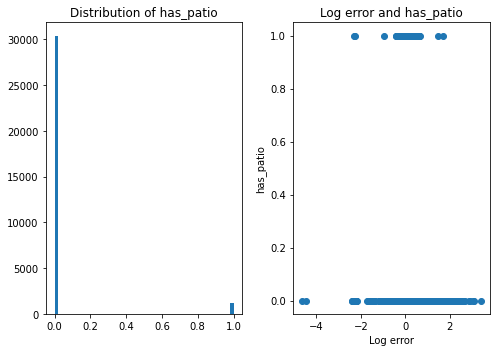

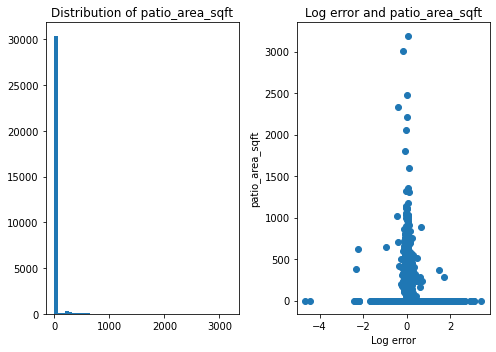

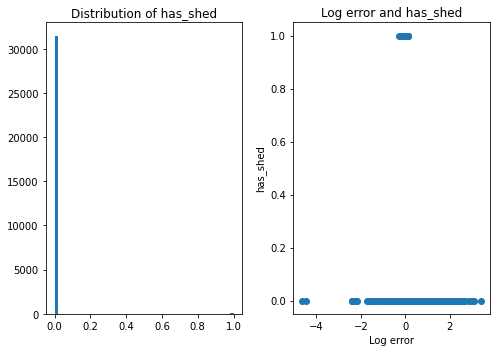

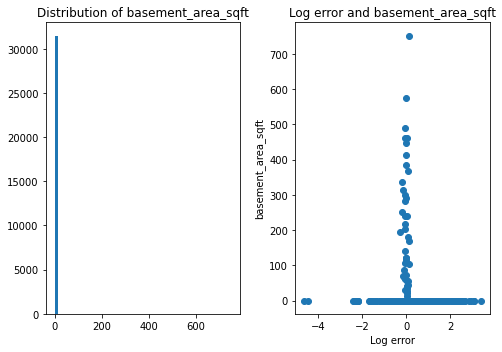

In [10]:
# Visualize the distribution of home features and logerror
for i in home_dists.columns[:-1]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,5))
    fig.subplots_adjust(left=None, bottom=0.1, right=0.9, top=0.9, wspace=0.9, hspace=0.2)
    ax1.hist(home_dists[i], bins=50)
    ax2.scatter(home_dists.logerror, home_dists[i])
    ax1.title.set_text(f'Distribution of {i}')
    ax2.title.set_text(f'Log error and {i}')
    ax2.set_xlabel('Log error')
    ax2.set_ylabel(f'{i}')
    plt.tight_layout()
    plt.show()

### Takeaways: Distributions of Home Features
Hypotheses
>Does the number of extra home features reported decrease the logerror?
>
>Does the number of bedrooms and restrooms significantly increase the logerror?

Feature Engineering
>Create binned variables of `num_of_restrooms` and `num_of_bedrooms`.
>
> Use KMeans clustering to create a new feature called `extras` to group properties together that have additional information reported: `has_pool`, `has_hottub_or_spa`, `has_patio`, `has_basement`


## Distributions of Tax Features

In [11]:
tax_dists = distributions[tax_features].copy()

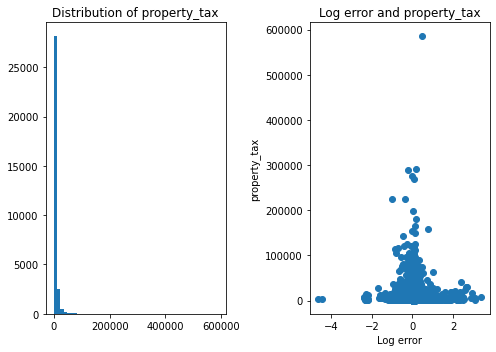

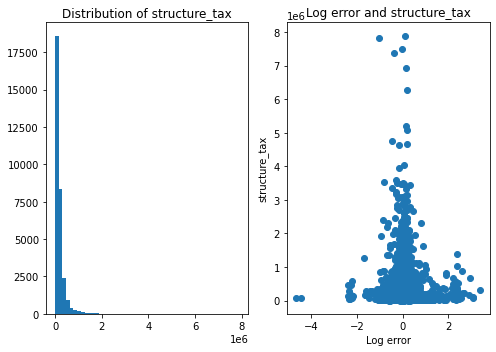

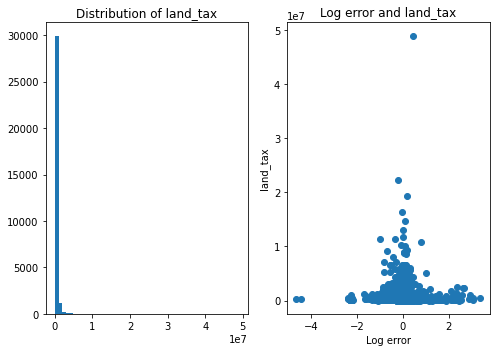

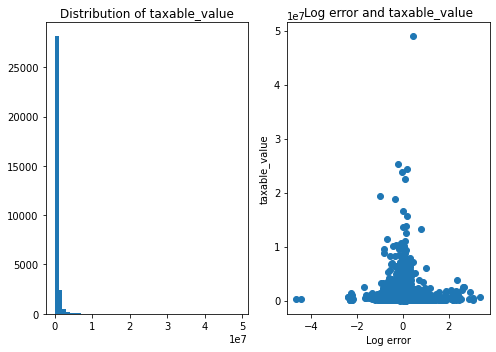

In [12]:
for i in tax_dists.columns[:-1]:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,5))
    fig.subplots_adjust(left=None, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
    ax1.hist(tax_dists[i], bins=50)
    ax2.scatter(tax_dists.logerror, tax_dists[i])
    ax1.title.set_text(f'Distribution of {i}')
    ax2.title.set_text(f'Log error and {i}')
    ax2.set_xlabel('Log error')
    ax2.set_ylabel(f'{i}')
    plt.tight_layout()
    plt.show()

### Takeaways: Distributions of Tax Features

Observations
> Properties that have less than $2 million structure_tax values contain the a lot of variation in `logerror`.

Hypotheses
> Is the land value less variable than the value of the building on the parcel of land?

---
# Plot the interactions of each feature and `logerror`.

Let's take a look at the interactions between each feature. 

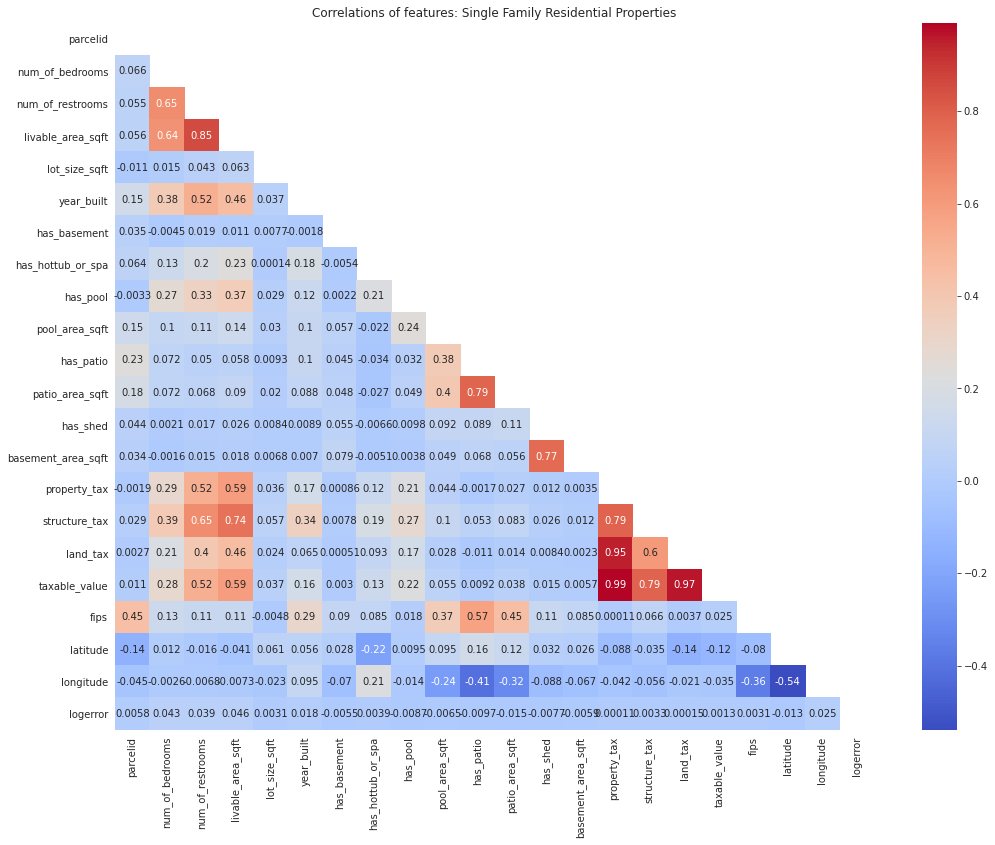

In [13]:
correlations = train.corr()
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(17, 13))
    ax = sns.heatmap(correlations,
                     mask=mask,
                     annot=True,
                     fmt='.2',
                     cmap='coolwarm'
                    )
    plt.title('Correlations of features: Single Family Residential Properties')

There's a lot of information to unpack. Let's focus on correlations between the features and `logerror`.

In [14]:
# A list of features sorted by their correlation with logerror
correlations[['logerror']].sort_values(by='logerror', ascending=False)[1:]

,logerror
livable_area_sqft,0.045942
num_of_bedrooms,0.043156
num_of_restrooms,0.039200
longitude,0.024600
year_built,0.018020
parcelid,0.005807
has_hottub_or_spa,0.003919
structure_tax,0.003304
lot_size_sqft,0.003082
fips,0.003063


Wow, features that describe the inside of the property are correlated with `logerror`<br>
1. `living_room_area_sqft`
1. `num_of_bedrooms`
1. `num_of_restrooms`

Interestingly, `longitude` is correlated with `logerror`. Let's create a new feature using kmeans to capture this interaction.

---

# Feature Engineering

Now that we've taken a look at the distributions of our features and their interactions with `logerror`, let's create new features.
1. Binned features
1. Kmeans features

## Binned Features
A few of the features that describe each property are represented as discrete values.<br>Let's create binned features of:<br>
- logerror 
- absolute logerror
- number of restrooms
- number of bedrooms

Why create a binned version of these features?
1. We open up the range of statistical tests we can perform on our data
2. Simplify visualizations

### `binned_log_error`

In [15]:
train.logerror.describe().T

count    31463.000000
mean         0.017259
std          0.179384
min         -4.655420
25%         -0.024738
50%          0.006832
75%          0.040518
max          3.394544
Name: logerror, dtype: float64

In [16]:
# create variable to store the min and max bin boundaries
min_logerr = train.logerror.min()
max_logerr = train.logerror.max()

# Subtract a small amunt from the min_logerror to include it in the smallest bin.
min_logerr -= 0.0001

In [17]:
binned_logerror_labels = [min_logerr, -4, -3, -2, -1, 0, 1, 2, 3, max_logerr]

In [18]:
binned_logerror_labels

[-4.655520377639999, -4, -3, -2, -1, 0, 1, 2, 3, 3.39454406516]

In [19]:
train['log_error_binned'] = pd.cut(
    
    train.logerror,
    bins=binned_logerror_labels,
    labels=['<= -4', '<= -3', '<= -2', '<= -1',
            '-1 <= 0', '1 >= 0', '>= 1', '>= 2',
            '>= 3']
)

In [20]:
# :)
train.log_error_binned.value_counts()

1 >= 0     17701
-1 <= 0    13600
>= 1          72
>= 2          47
<= -1         22
<= -2         16
>= 3           3
<= -4          2
<= -3          0
Name: log_error_binned, dtype: int64

### `absolute_logerror`

In [21]:
train['absolute_logerror'] = abs(train.logerror)

In [22]:
train['absolute_log_error_binned'] = pd.cut(

    train.absolute_logerror,
    bins=[0, 0.01, 0.25, 0.5 , 1, 5],
    labels=[0.000001, 0.01, 0.25, 0.5, 1]
)

In [23]:
# most log errors are within 0.01
train.absolute_log_error_binned.value_counts().sort_index()

1e-06     5679
0.01     24245
0.25      1012
0.5        365
1.0        162
Name: absolute_log_error_binned, dtype: int64

### `num_of_restrooms_binned`

In [24]:
train.num_of_restrooms.describe().T

count    31463.000000
mean         2.306980
std          1.026015
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         18.000000
Name: num_of_restrooms, dtype: float64

In [25]:
train['num_of_restrooms_binned'] = pd.cut(train.num_of_restrooms,
                                          bins=[.99, 2, 4, 6, 8, 10, 14, 18],
                                          labels=[2, 4, 6, 8, 10, 14, 18])

In [26]:
train.num_of_restrooms_binned.value_counts()

2     19447
4     10633
6      1234
8       130
10       16
14        2
18        1
Name: num_of_restrooms_binned, dtype: int64

### `num_of_bedrooms_binned`

In [27]:
train.num_of_bedrooms.describe().T

count    31463.000000
mean         3.312367
std          0.935700
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         14.000000
Name: num_of_bedrooms, dtype: float64

In [28]:
train['num_of_bedrooms_binned'] = pd.cut(train.num_of_restrooms,
                                          bins=[.99, 2, 4, 6, 8, 10, 14],
                                          labels=[2, 4, 6, 8, 10, 14])

In [29]:
train.num_of_bedrooms_binned.value_counts()

2     19447
4     10633
6      1234
8       130
10       16
14        2
Name: num_of_bedrooms_binned, dtype: int64

# Kmeans Clustering

1. longitude is correlated with logerror. Let's create a new feature using kmeans to capture this interaction.
2. Structure tax looks like it contains more logerror than the rest of the tax features.
3. Additional Features reported.

> The elbow method for each cluster is in the [appendix](#Appendix)

In [30]:
from sklearn.cluster import KMeans

In [31]:
df = prepare_zillow()
train_set, validate, test = train_validate_test(df)
train_set, validate, test = impute_values(train_set, validate, test)

In [32]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31463 entries, 50002 to 25206
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   parcelid            31463 non-null  int64  
 1   num_of_bedrooms     31463 non-null  float64
 2   num_of_restrooms    31463 non-null  float64
 3   livable_area_sqft   31463 non-null  float64
 4   lot_size_sqft       31463 non-null  float64
 5   year_built          31463 non-null  int64  
 6   has_basement        31463 non-null  int64  
 7   has_hottub_or_spa   31463 non-null  int64  
 8   has_pool            31463 non-null  int64  
 9   pool_area_sqft      31463 non-null  float64
 10  has_patio           31463 non-null  int64  
 11  patio_area_sqft     31463 non-null  float64
 12  has_shed            31463 non-null  int64  
 13  basement_area_sqft  31463 non-null  float64
 14  property_tax        31463 non-null  float64
 15  structure_tax       31463 non-null  float64
 16  

In [33]:
train_set.drop(columns=['parcelid', 'date_sold'], inplace=True)

In [34]:
X_train, y_train = attributes_target_split(train_set, 'logerror')
X_validate, y_validate = attributes_target_split(validate, 'logerror')
X_test, y_test = attributes_target_split(test, 'logerror')

In [35]:
from sklearn.preprocessing import StandardScaler
from preprocess import features_for_modeling

In [36]:
scaler = StandardScaler()
X_train, X_validate, X_test = add_scaled_columns(X_train, X_validate, X_test, scaler)

In [37]:
features_for_modeling(X_train, y_train, 5)

Select K Best: 5 features
['num_of_bedrooms_scaled', 'num_of_restrooms_scaled', 'livable_area_sqft_scaled', 'year_built_scaled', 'longitude_scaled']
Recursive Feature Elimination: 5 features
['livable_area_sqft_scaled', 'property_tax_scaled', 'structure_tax_scaled', 'land_tax_scaled', 'taxable_value_scaled']


""


In [38]:
X_train.columns.to_list()

['num_of_bedrooms_scaled',
 'num_of_restrooms_scaled',
 'livable_area_sqft_scaled',
 'lot_size_sqft_scaled',
 'year_built_scaled',
 'has_basement_scaled',
 'has_hottub_or_spa_scaled',
 'has_pool_scaled',
 'pool_area_sqft_scaled',
 'has_patio_scaled',
 'patio_area_sqft_scaled',
 'has_shed_scaled',
 'basement_area_sqft_scaled',
 'property_tax_scaled',
 'structure_tax_scaled',
 'land_tax_scaled',
 'taxable_value_scaled',
 'fips_scaled',
 'latitude_scaled',
 'longitude_scaled']

In [39]:
def cluster_features(X_train, X_validate, X_test):   
    cluster_columns_1 = ['longitude_scaled',
                         'latitude_scaled',
                         'structure_tax_scaled']

    cluster_columns_2 = ['has_basement_scaled',
                         'has_hottub_or_spa_scaled',
                         'has_pool_scaled',
                         'has_patio_scaled',
                         'has_shed_scaled']

    cluster_columns_3 = ['livable_area_sqft_scaled',
                         'lot_size_sqft_scaled',
                         'year_built_scaled']

    kmeans1 = KMeans(n_clusters=7, random_state=0)
    kmeans2 = KMeans(n_clusters=6, random_state=0)
    kmeans3 = KMeans(n_clusters=6, random_state=0)

    cluster_1 = X_train[cluster_columns_1].copy()
    cluster_2 = X_train[cluster_columns_2].copy()
    cluster_3 = X_train[cluster_columns_3].copy()

    X_train['cluster_1'] = kmeans1.fit(cluster_1).labels_
    X_validate['cluster_1'] = kmeans1.predict(X_validate[cluster_columns_1])
    X_test['cluster_1'] = kmeans1.predict(X_test[cluster_columns_1])

    X_train['cluster_2'] = kmeans2.fit(cluster_2).labels_
    X_validate['cluster_2'] = kmeans2.predict(X_validate[cluster_columns_2])
    X_test['cluster_2'] = kmeans2.predict(X_test[cluster_columns_2])

    X_train['cluster_3'] = kmeans3.fit(cluster_3).labels_
    X_validate['cluster_3'] = kmeans3.predict(X_validate[cluster_columns_3])
    X_test['cluster_3'] = kmeans3.predict(X_test[cluster_columns_3])
    
    return X_train, X_validate, X_test, cluster_1, cluster_2, cluster_3

In [40]:
X_train, X_validate, X_test, cluster_1, cluster_2, cluster_3 = cluster_features(X_train, X_validate, X_test)

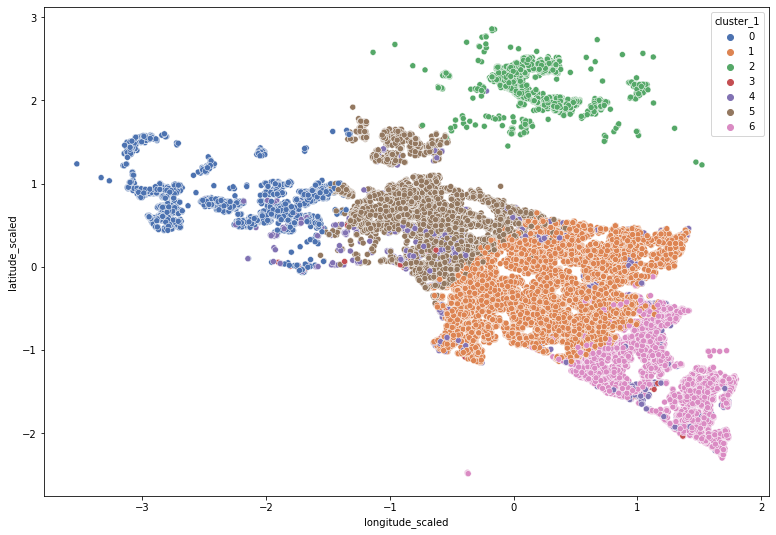

In [41]:
plt.figure(figsize=(13, 9))
sns.scatterplot(X_train.longitude_scaled,
                X_train.latitude_scaled,
                hue=X_train.cluster_1,
                palette='deep')
plt.show()

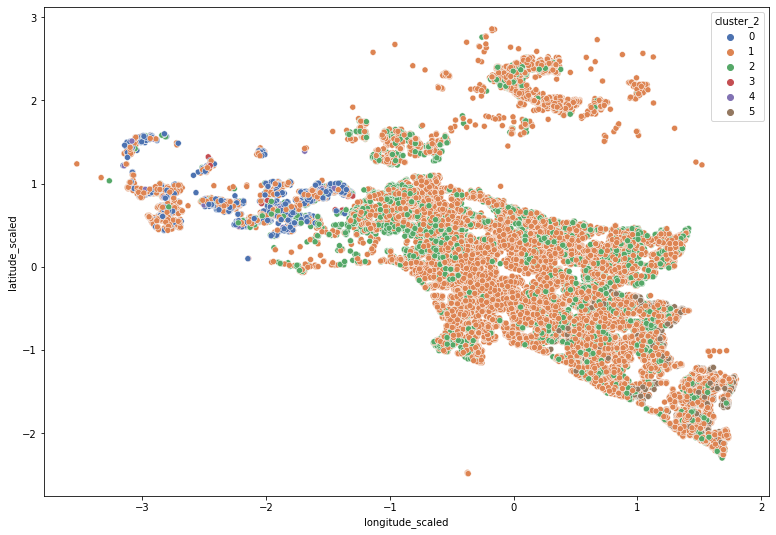

In [42]:
plt.figure(figsize=(13, 9))
sns.scatterplot(X_train.longitude_scaled,
                X_train.latitude_scaled,
                hue=X_train.cluster_2,
                palette='deep')
plt.show()

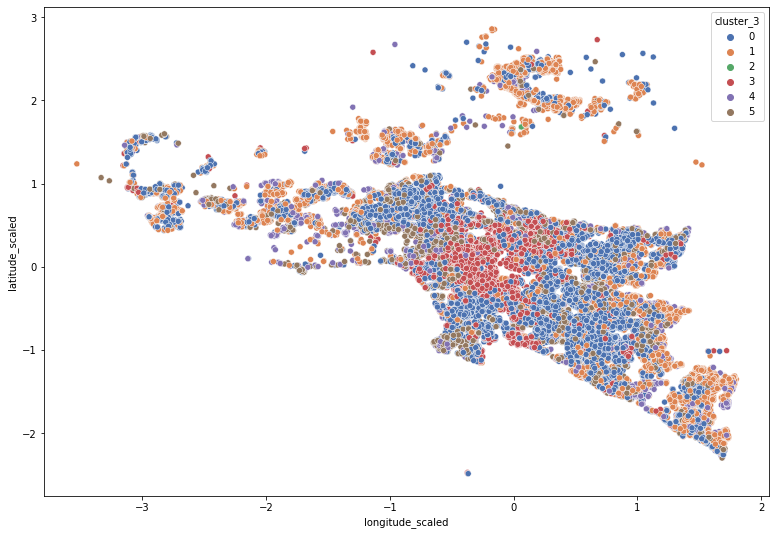

In [43]:
plt.figure(figsize=(13, 9))
sns.scatterplot(X_train.longitude_scaled,
                X_train.latitude_scaled,
                hue=X_train.cluster_3,
                palette='deep'
               )
plt.show()

# Properties geographical locations

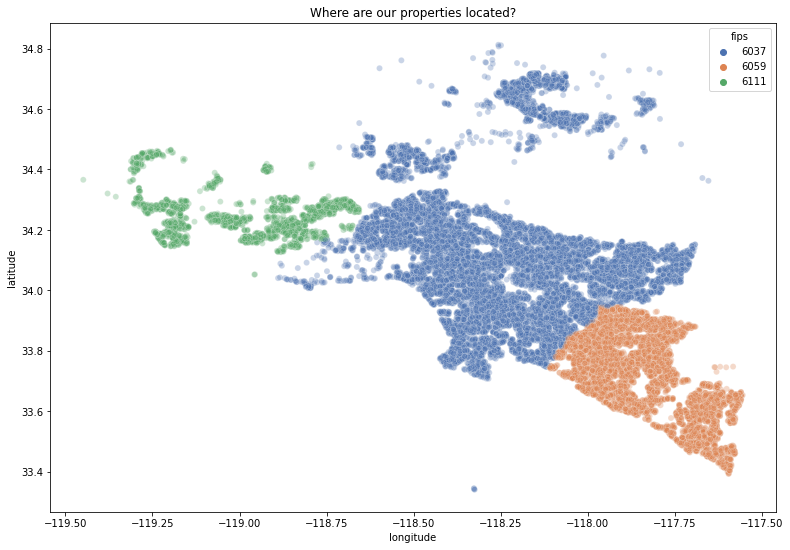

In [44]:
plt.figure(figsize=(13, 9))
sns.scatterplot(train.longitude,
                train.latitude,
                hue=train.fips,
                palette='deep',
                alpha=.3
               )
plt.title('Where are our properties located?')
plt.show()

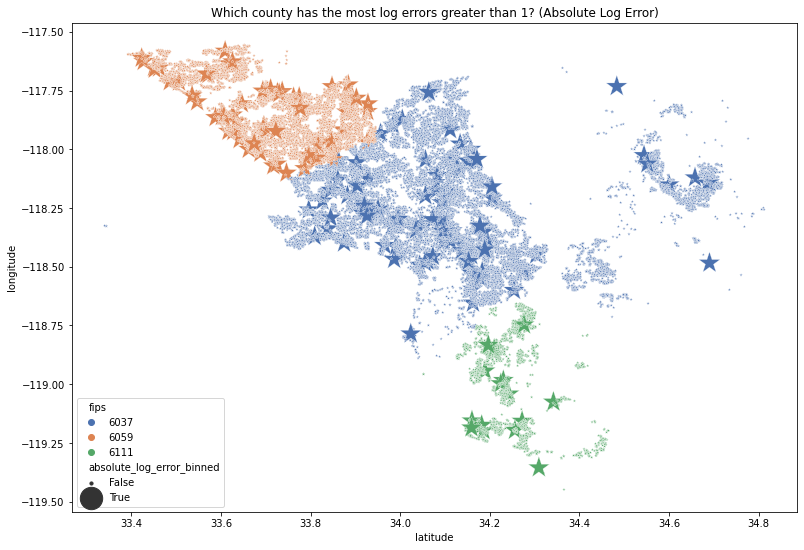

In [45]:
plt.figure(figsize=(13, 9))
sns.scatterplot(train.latitude,
                train.longitude,
                hue=train.fips,
                size=train.absolute_log_error_binned==1,
                palette='deep',
                marker='*',
                sizes=(500, 10),
               )
plt.title('Which county has the most log errors greater than 1? (Absolute Log Error)')
plt.show()

In [46]:
# Just checking that the exisiting algorithm that Zillow's
# Zestimate missing the mark 100% of the time (looking at the training set only...)
(train.logerror == 0).sum()

0

# Hypothesis Tests

<br>

<strong>ANOVA Statistical Tests</strong>
- Is the logerror significantly different between counties?

<strong>T-Tests</strong>
- Is the logerror significantly different for homes with pools than those without?
- Is the logerror significantly different for homes with sheds than those without?
- Is the logerror significantly different for homes with patios than those without?
- Is the logerror significantly different for homes with a spa or hottub than those without?
- Is the property tax value significantly greater in los angeles than the other counties?
- Is the logerror significantly greater than the average for homes with more than x restrooms than those with less than x restrooms?
- Is the logerror significantly greater than the average for homes with more than x bedrooms than those with less than x bedrooms?

> Test for independence

Let's create subsets of our data to perform statistical tests on.

In [47]:
# Initialize our confidence interval and alpha value
confidence_interval = 0.95
alpha = 1 - confidence_interval

# ANOVA

Null Hypothesis \$H_{0}$:

    There is no difference between the mean logerrors of each county. 

Alternative Hypothesis \$Ha$:

    There is a significant difference between the mean logerrors of each county.


In [48]:
f, p = stats.f_oneway(train[train.fips==6111].logerror,
                      train[train.fips==6037].logerror,
                      train[train.fips==6059].logerror
                     )
print(("ANOVA F-Statistic: {:.2f}" \
      "\nP-Value: {:.2f}\nalpha: {:.2f}\n").format(f, p, alpha))


# Determine the appropriate Hypothesis.
if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO.' \
          ' There is a significant difference between the mean logerrors of each county.')
else:
    print('Fail to reject HO. ' \
          'There is no significant difference between the mean logerrors of each county.')

ANOVA F-Statistic: 8.97
P-Value: 0.00
alpha: 0.05

P-Value is less than alpha:
Reject HO. There is a significant difference between the mean logerrors of each county.


In [49]:
# The median logerror between each group is not the same.
k, p = stats.kruskal(
    train[train.fips==6111].logerror,
    train[train.fips==6037].logerror,
    train[train.fips==6059].logerror
)

# T-Test

Let's perform two tailed t-tests. Because our target variable is both negative and positive, we want to measure both tails.

## Two Sample Two Tailed T-Test

Null Hypothesis \$H_{0}$:

    There is no difference between the mean logerrors of Los Angeles county and Orange county. 

Alternative Hypothesis \$Ha$:

    There is a difference between the mean logerrors of Los Angeles county and Orange county. 


In [50]:
t, p = stats.ttest_ind(train[train.fips==6037].logerror,
                       train[train.fips==6111].logerror
                      )

print(("T-Statistic: {:.2f}" \
      "\nP-Value: {:.2f}\nalpha: {:.2f}\n").format(t, p, alpha))


# Determine the appropriate Hypothesis.
if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO.' \
          ' There is a significant difference between the mean '\
          'logerrors of Los Angeles county and Orange county.')
else:
    print('Fail to reject HO. ' \
          'There is no difference between the mean logerrors '\
          'of Los Angeles county and Orange county.')

T-Statistic: 0.73
P-Value: 0.47
alpha: 0.05

Fail to reject HO. There is no difference between the mean logerrors of Los Angeles county and Orange county.


Null Hypothesis \$H_{0}$:

    There is no difference between the mean logerrors of Los Angeles county and Ventura county.

Alternative Hypothesis \$Ha$:

    There is a difference between the mean logerrors of Los Angeles county and Ventura county. 


In [51]:
# :O
t, p = stats.ttest_ind(train[train.fips==6037].logerror,
                       train[train.fips==6059].logerror
                      )
print(("T-Statistic: {:.2f}" \
      "\nP-Value: {:.2f}\nalpha: {:.2f}\n").format(t, p, alpha))

# Determine the appropriate Hypothesis.
if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO.' \
          ' There is a significant difference between the mean '\
          'logerrors of Los Angeles county and Ventura county.')
else:
    print('Fail to reject HO. ' \
          'There is no difference between the mean logerrors '\
          'of Los Angeles county and Ventura county.')

T-Statistic: -3.95
P-Value: 0.00
alpha: 0.05

P-Value is less than alpha:
Reject HO. There is a significant difference between the mean logerrors of Los Angeles county and Ventura county.


Null Hypothesis \$H_{0}$:

    There is no difference between the mean logerrors of Ventura county and Orange county.

Alternative Hypothesis \$Ha$:

    There is a difference between the mean logerrors of Ventura county and Orange county. 


In [52]:
# :O
t, p = stats.ttest_ind(train[train.fips==6059].logerror,
                       train[train.fips==6111].logerror
                      )
print(("T-Statistic: {:.2f}" \
      "\nP-Value: {:.2f}\nalpha: {:.2f}\n").format(t, p, alpha))


# Determine the appropriate Hypothesis.
if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO.' \
          ' There is a significant difference between the mean '\
          'logerrors of Ventura county and Orange county.')
else:
    print('Fail to reject HO. ' \
          'There is no difference between the mean logerrors '\
          'of Ventura county and Orange county.')

T-Statistic: 2.76
P-Value: 0.01
alpha: 0.05

P-Value is less than alpha:
Reject HO. There is a significant difference between the mean logerrors of Ventura county and Orange county.


### Takeaways: Two Sample Two Tailed T-Tests
1. 1
2. 1
3. 1

## One Sample Two Tailed T-Test

In [53]:
t, p = stats.ttest_1samp(train[train.fips==6111].logerror, train.logerror.mean())

print(("T-Statistic: {:.2f}" \
      "\nP-Value: {:.2f}\nalpha: {:.2f}\n").format(t, p, alpha))


# Determine the appropriate Hypothesis.
if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO.' \
          ' There is a significant difference between the population mean logerror and '\
          'the mean logerror of Orange county.')
else:
    print('Fail to reject HO. ' \
          ' There is no significant difference between the population mean logerror and '\
          'the mean logerror of Orange county.')

T-Statistic: -1.52
P-Value: 0.13
alpha: 0.05

Fail to reject HO.  There is no significant difference between the population mean logerror and the mean logerror of Orange county.


In [54]:
t, p = stats.ttest_1samp(train[train.fips==6059].logerror, train.logerror.mean())

print(("T-Statistic: {:.2f}" \
      "\nP-Value: {:.2f}\nalpha: {:.2f}\n").format(t, p, alpha))


# Determine the appropriate Hypothesis.
if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO.' \
          ' There is a significant difference between the population mean logerror and '\
          'the mean logerror of Ventura county.')
else:
    print('Fail to reject HO. ' \
          ' There is no significant difference between the population mean logerror and '\
          'the mean logerror of Ventura county.')

T-Statistic: 3.23
P-Value: 0.00
alpha: 0.05

P-Value is less than alpha:
Reject HO. There is a significant difference between the population mean logerror and the mean logerror of Ventura county.


In [55]:
t, p = stats.ttest_1samp(train[train.fips==6037].logerror, train.logerror.mean())

print(("T-Statistic: {:.2f}" \
      "\nP-Value: {:.2f}\nalpha: {:.2f}\n").format(t, p, alpha))


# Determine the appropriate Hypothesis.
if p < alpha:
    print("P-Value is less than alpha:")
    print('Reject HO.' \
          ' There is a significant difference between the population mean logerror and '\
          'the mean logerror of Los Angeles county.')
else:
    print('Fail to reject HO. ' \
          ' There is no significant difference between the population mean logerror and '\
          'the mean logerror of Los Angeles county.')

T-Statistic: -1.87
P-Value: 0.06
alpha: 0.05

Fail to reject HO.  There is no significant difference between the population mean logerror and the mean logerror of Los Angeles county.


## `has_pool`

In [56]:
t, p = stats.ttest_ind(train[train.has_pool==1].logerror, train[train.has_pool==0].logerror)
print(t, p)

-1.5494151244618113 0.1212920188940172


## `has_shed`

In [57]:
t, p = stats.ttest_ind(train[train.has_shed==1].logerror, train[train.has_shed==0].logerror)
print(t, p)

-1.3664639250348976 0.17180316200380907


## `has_patio`

In [58]:
traint, p = stats.ttest_ind(train[train.has_patio==1].logerror, train[train.has_patio==0].logerror)
print(t, p)

-1.3664639250348976 0.08425752373341996


## `has_hottub_or_spa`

In [59]:
t, p = stats.ttest_ind(train[train.has_hottub_or_spa==1].logerror, train[train.has_hottub_or_spa==0].logerror)
print(t, p)

0.6950597817413485 0.48702297101252356


## `has_basement`

In [60]:
t, p = stats.ttest_ind(train[train.has_basement==1].logerror, train[train.has_basement==0].logerror)
print(t, p)

-0.9695804969495023 0.3322630918922421


## Bedrooms and Restrooms

In [61]:
# :O
t, p = stats.ttest_ind(train[train.num_of_bedrooms > 5].logerror,
                       train[train.num_of_bedrooms <= 5].logerror
                      )
print(t, p)

4.625738637035254 3.747508645434888e-06


In [62]:
# :O
t, p = stats.ttest_ind(train[train.num_of_restrooms > 5].logerror,
                       train[train.num_of_restrooms <= 5].logerror
                      )
print(t, p)

4.563019101318878 5.061360213842951e-06


## Summary of T-Tests

- 6059 Ventura County have the most significantly different log error than 6111 Orange County and 6037 Los Angeles.
- Properties with more than 5 bedroom and 5 bathrooms have a significantly higher log error than properties with less than 5 bedrooms or bathrooms.



# Chi2 Test

- Restrooms and logerror
- Bedrooms and logerror

### Restrooms and `logerror`

In [63]:
restrooms_and_absolute_logerror_binned = pd.crosstab(
    train.num_of_restrooms_binned,
    train.absolute_log_error_binned
)

restrooms_and_logerror_binned = pd.crosstab(
    train.num_of_restrooms_binned,
    train.log_error_binned
                                           )

In [64]:
restrooms_and_absolute_logerror_binned

absolute_log_error_binned,1e-06,0.01,0.25,0.5,1.0
num_of_restrooms_binned,,,,,
2,3384,15027,677,260,99
4,2145,8100,262,80,46
6,137,1003,63,17,14
8,13,102,7,6,2
10,0,11,2,2,1
14,0,2,0,0,0
18,0,0,1,0,0


In [65]:
restrooms_and_logerror_binned

log_error_binned,<= -4,<= -2,<= -1,-1 <= 0,1 >= 0,>= 1,>= 2,>= 3
num_of_restrooms_binned,,,,,,,,
2,2,9,16,8917,10431,53,17,2
4,0,7,3,4259,6328,15,20,1
6,0,0,2,380,840,4,8,0
8,0,0,0,40,88,0,2,0
10,0,0,1,4,11,0,0,0
14,0,0,0,0,2,0,0,0
18,0,0,0,0,1,0,0,0


In [66]:
chi2, p, dof, ex = stats.chi2_contingency(restrooms_and_absolute_logerror_binned)
print(chi2, p)

224.95488101215975 1.4337526972501983e-34


In [67]:
chi2, p, dof, ex = stats.chi2_contingency(restrooms_and_logerror_binned)
print(chi2, p)

330.112312474459 2.183842615654309e-46


### Bedrooms and `logerror`

In [68]:
bedrooms_and_absolute_logerror_binned = pd.crosstab(train.num_of_bedrooms_binned,
                                        train.absolute_log_error_binned)

bedrooms_and_logerror_binned = pd.crosstab(train.num_of_bedrooms_binned,
                                           train.log_error_binned
                                           )

In [69]:
bedrooms_and_absolute_logerror_binned

absolute_log_error_binned,1e-06,0.01,0.25,0.5,1.0
num_of_bedrooms_binned,,,,,
2,3384,15027,677,260,99
4,2145,8100,262,80,46
6,137,1003,63,17,14
8,13,102,7,6,2
10,0,11,2,2,1
14,0,2,0,0,0


In [70]:
bedrooms_and_logerror_binned

log_error_binned,<= -4,<= -2,<= -1,-1 <= 0,1 >= 0,>= 1,>= 2,>= 3
num_of_bedrooms_binned,,,,,,,,
2,2,9,16,8917,10431,53,17,2
4,0,7,3,4259,6328,15,20,1
6,0,0,2,380,840,4,8,0
8,0,0,0,40,88,0,2,0
10,0,0,1,4,11,0,0,0
14,0,0,0,0,2,0,0,0


In [71]:
chi2, p, dof, ex = stats.chi2_contingency(bedrooms_and_absolute_logerror_binned)
print(chi2, p)

194.90023617263125 1.1450549917010285e-30


In [72]:
chi2, p, dof, ex = stats.chi2_contingency(bedrooms_and_logerror_binned)
print(chi2, p)

329.3287852777636 1.492591840569262e-49


## Clusters and Log error

In [73]:
clust_1 = pd.crosstab(X_train.cluster_1, train.absolute_log_error_binned)
chi2, p, dof, ex = stats.chi2_contingency(clust_1)
print(chi2, p)

278.97325644727607 2.7913854512752828e-45


In [74]:
clust_2 = pd.crosstab(X_train.cluster_2, train.absolute_log_error_binned)
chi2, p, dof, ex = stats.chi2_contingency(clust_2)
print(chi2, p)

59.656758428173625 8.047279114316802e-06


In [75]:
clust_3 = pd.crosstab(X_train.cluster_3, train.absolute_log_error_binned)
chi2, p, dof, ex = stats.chi2_contingency(clust_3)
print(chi2, p)

574.0406415982656 8.392573848462182e-109


### Summary of Chi2 Hypothesis testing
Log error is dependent on the number of restrooms and bedrooms a property has.

<br>
<br>

## Other Chi2 Tests

In [76]:
# Chi2 dependent
pools_and_fips = pd.crosstab(train.has_pool, train.fips)

In [77]:
chi2, p, dof, ex = stats.chi2_contingency(pools_and_fips)
print(chi2, p)

48.35491418190293 3.161286079492081e-11


In [78]:
beds_and_baths_binned = pd.crosstab(
    train.num_of_bedrooms_binned,
    train.num_of_restrooms_binned
)

chi2, p, dof, ex = stats.chi2_contingency(beds_and_baths_binned)
print(chi2, p)

157309.99999999997 0.0


In [79]:
beds_and_baths = pd.crosstab(
    train.num_of_bedrooms,
    train.num_of_restrooms
)

In [80]:
chi2, p, dof, ex = stats.chi2_contingency(beds_and_baths)
print(chi2, p)

70822.9045982922 0.0


### `num_bed_rooms` and `fips`

In [81]:
bedrooms_and_fips = pd.crosstab(train.num_of_bedrooms, train.fips)

In [82]:
chi2, p, dof, ex = stats.chi2_contingency(bedrooms_and_fips)
print(chi2, p)

1006.1755179752604 4.3477987756621814e-197


In [83]:
restrooms_and_fips = pd.crosstab(train.num_of_restrooms, train.fips)

In [84]:
chi2, p, dof, ex = stats.chi2_contingency(restrooms_and_fips)
print(chi2, p)

9172.364268767311 0.0


## Summary of Hypothesis Testing
- Log error is significantly higher in Ventura county
- Properties with more than 5 bedroom and 5 bathrooms have a significantly higher log error than properties with less than 5 bedrooms or bathrooms.
- Log error is dependent on the number of restrooms and number of bathrooms a property has.
- Having a pool is dependent on which county you're in.


On to modeling :)

# Appendix

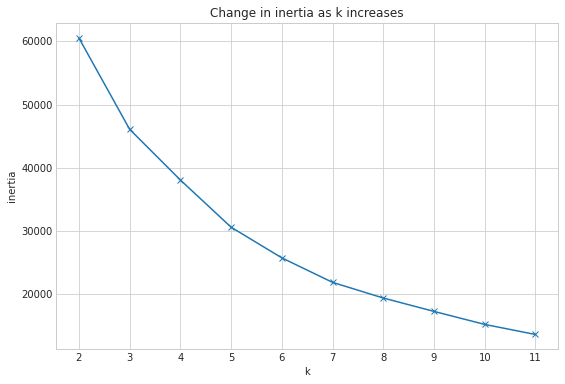

In [85]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(cluster_1).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

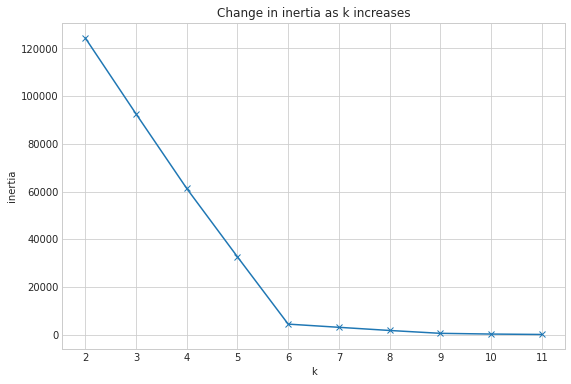

In [86]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(cluster_2).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

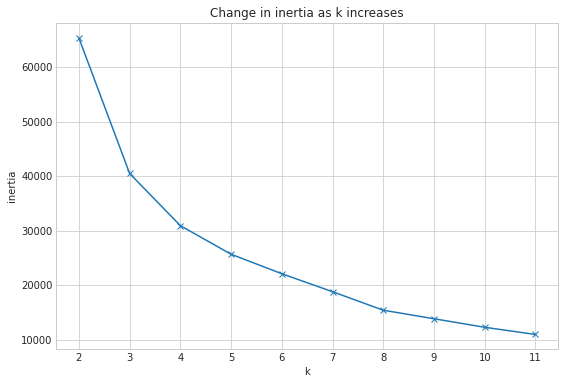

In [87]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(cluster_3).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [88]:
# Categorical values
categorical_features = df.nunique()[df.nunique() < 22].index.to_list()
numerical_features = df.drop(columns=categorical_features).columns.to_list()

In [89]:
df_categorical_features = df[categorical_features]
df_numerical_features = df[numerical_features]

```python
for i in distributions.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,5))
    fig.subplots_adjust(left=None, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
    ax1.hist(distributions[i], bins=50)
    ax2.scatter(distributions.logerror, distributions[i])
    ax1.title.set_text(f'Distribution of {i}')
    ax2.title.set_text(f'Log error and {i}')
    ax2.set_xlabel('Log error')
    ax2.set_ylabel(f'{i}')
    plt.tight_layout()
    plt.show()
```

[zillow-zestimate](https://www.zillow.com/zestimate/)

Notes:
`The Zestimate® home valuation model is Zillow’s estimate of a home's market value. The Zestimate incorporates public and user-submitted data, taking into account home facts, location and market conditions.`

`It is not an appraisal and it should be used as a starting point. We encourage buyers, sellers and homeowners to supplement the Zestimate with other research such as visiting the home, getting a professional appraisal of the home, or requesting a comparative market analysis (CMA) from a real estate agent.`

`The amount of data we have for your home and homes in your area directly affects the Zestimate's accuracy. If the data is incorrect or incomplete, update your home facts — this may affect your Zestimate.`    
    
`The Zestimate was created to give consumers more information about homes and the housing market. It is intended to provide user-friendly data to promote transparent real estate markets and allow people to make more informed decisions — it should not be used to drive up the price of a home. Zestimates are designed to track the market, not drive it.`
    
`The Zestimate is not an appraisal and can't be used in place of an appraisal. It is a computer-generated estimate of the value of a home today, given the available data.`

`Note: The Zestimate's accuracy is computed by comparing the final sale price to the Zestimate that was published on or just prior to the sale date.`

`Median Error:
    The nationwide median error rate for the Zestimate for on-market homes is 1.9%, while the Zestimate for off-market homes has a median error rate of 7.5%. This means that the Zestimates for half of all on-market homes are within 2% of the selling price, and half are not. For most major markets, the Zestimate for on-market homes is within 10% of the final sale price more than 95% of the time.`